In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [27]:
data = pd.read_csv("salarydata.csv")
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [28]:
sorted(data.columns)

['age',
 'capital-gain',
 'capital-loss',
 'education',
 'education-num',
 'hours-per-week',
 'marital-status',
 'native-country',
 'occupation',
 'race',
 'relationship',
 'salary',
 'sex',
 'workclass']

In [29]:
target = data.pop('salary')

data.head()



,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


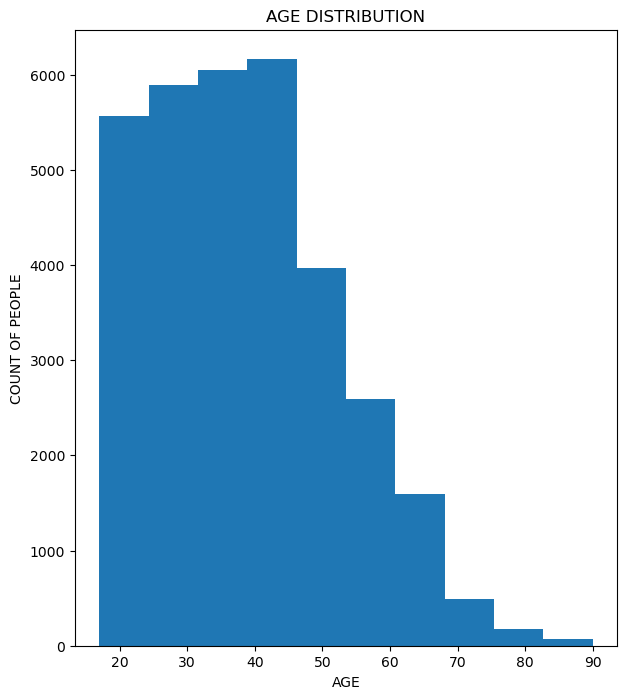

In [30]:
plt.hist(data['age'])
plt.xlabel("AGE")
plt.ylabel("COUNT OF PEOPLE")
plt.title("AGE DISTRIBUTION")
plt.show()

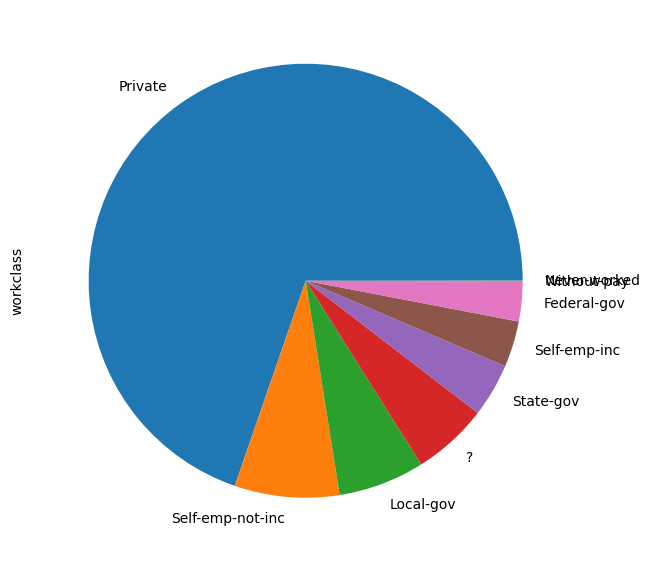

In [31]:
data["workclass"].value_counts().plot(kind='pie')
plt.rcParams['figure.figsize']=(7,9)
plt.show()

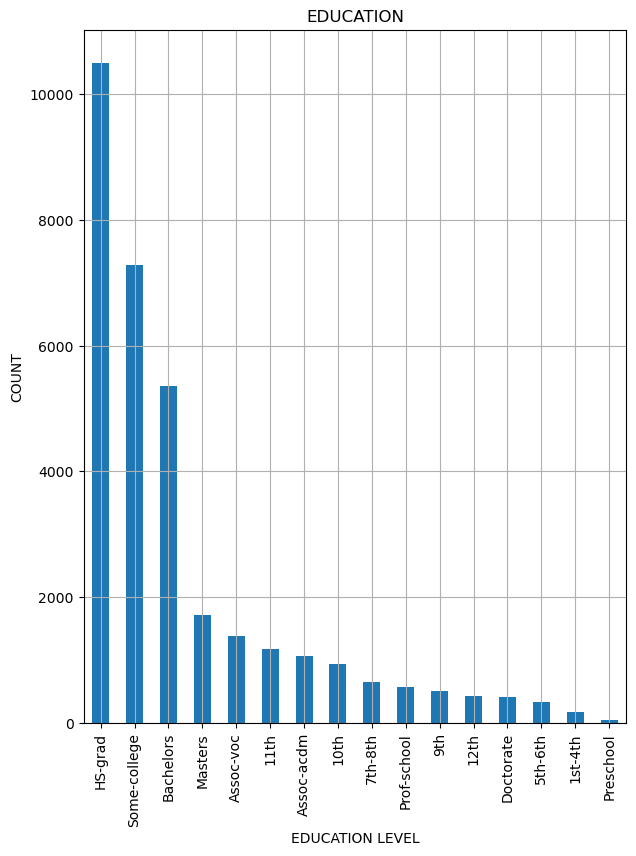

In [32]:
data["education"].value_counts().plot(kind="bar")
plt.xlabel("EDUCATION LEVEL")
plt.ylabel("COUNT")
plt.title("EDUCATION")
plt.rcParams["figure.figsize"]=(4,9)
plt.grid()
plt.show()

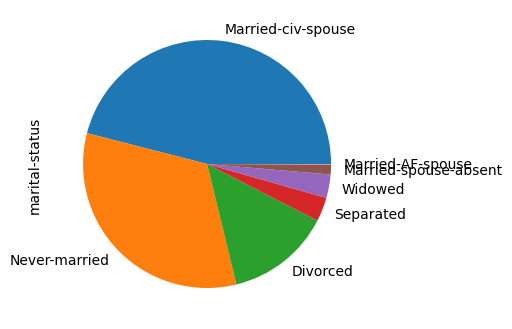

In [33]:
data["marital-status"].value_counts().plot(kind='pie')
plt.show()

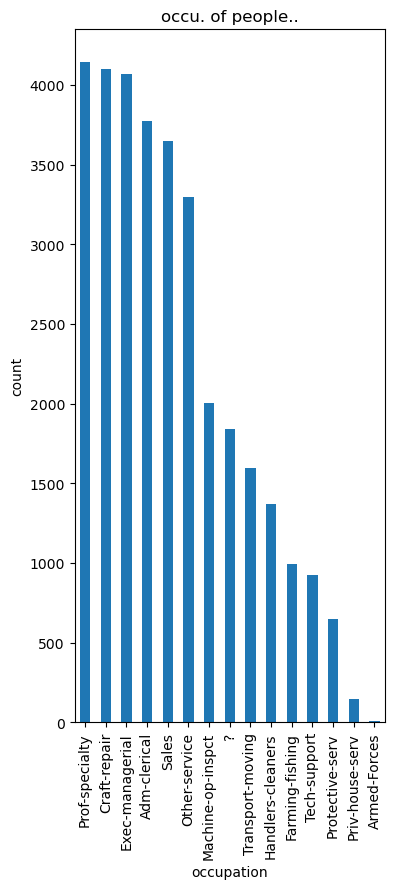

In [34]:
data["occupation"].value_counts().plot(kind='bar')
plt.xlabel("occupation")
plt.ylabel("count")
plt.title("occu. of people..")
plt.show()

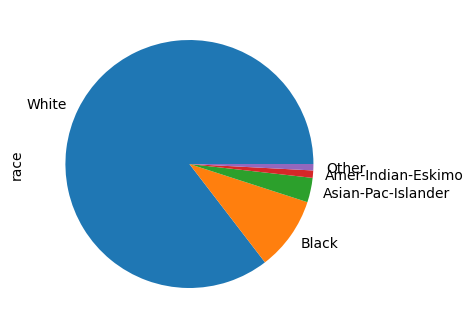

In [35]:
data["race"].value_counts().plot(kind="pie")
plt.show()

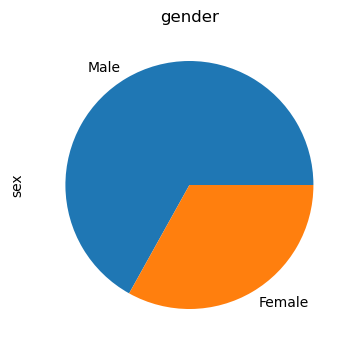

In [36]:
data["sex"].value_counts().plot(kind="pie")
plt.title('gender')
plt.show()

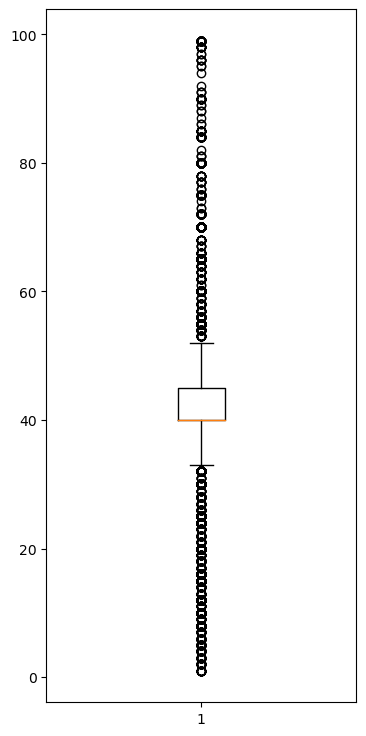

In [37]:
plt.boxplot(data["hours-per-week"])
plt.rcParams['figure.figsize']=(19,8)
plt.show()

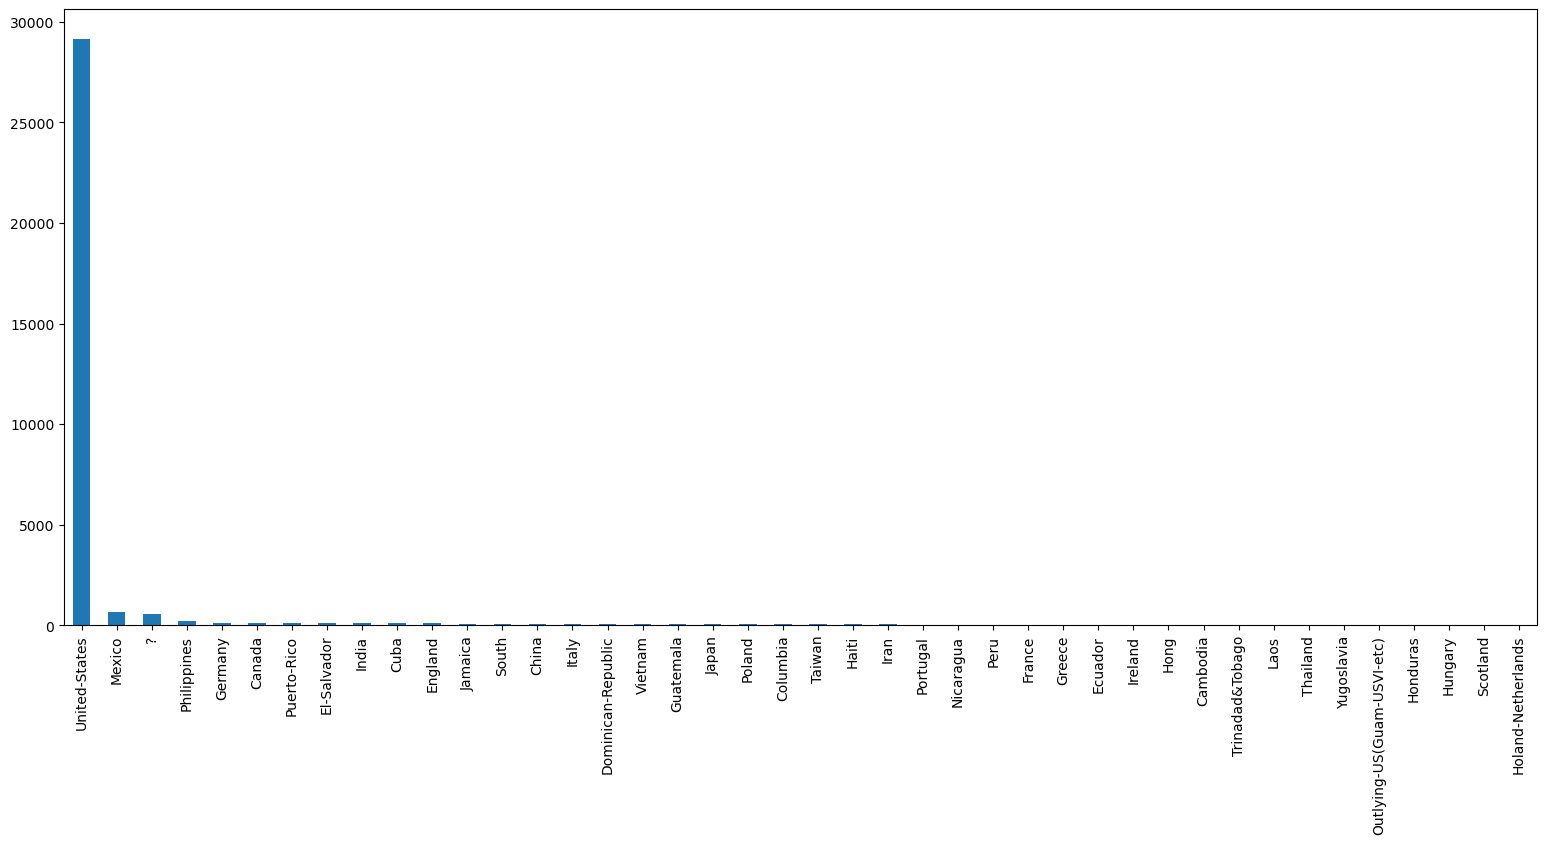

In [38]:
data["native-country"].value_counts().plot(kind="bar")
plt.rcParams['figure.figsize'] = (7,8)
plt.show()

In [39]:
data = data.drop(columns=['capital-gain','capital-loss'])



In [40]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba


In [41]:
char_col = data.dtypes.pipe(lambda x:x[x=='object']).index
lable_mapping = {}

for c in char_col:
    data[c],lable_mapping[c] = pd.factorize(data[c]) 


In [42]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,0,0,13,0,0,0,0,0,40,0
1,50,1,0,13,1,1,1,0,0,13,0
2,38,2,1,9,2,2,0,0,0,40,0
3,53,2,2,7,1,2,1,1,0,40,0
4,28,2,0,13,1,3,2,1,1,40,1


In [46]:

scaler = StandardScaler()
data = scaler.fit_transform(data)

x_test,x_train,y_test,y_train = train_test_split(data,target)

clf = LogisticRegression().fit(x_train,y_train)

pred = clf.predict(x_test)

print("training complete")


training complete


In [48]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       <=50K       0.83      0.93      0.88     18540
        >50K       0.64      0.41      0.50      5880

    accuracy                           0.80     24420
   macro avg       0.74      0.67      0.69     24420
weighted avg       0.79      0.80      0.79     24420

